# **Reduksi Dimensi dengan Menggunakan Latent Dirichlet Allocation (LDA)**

## **Import library yang diperlukan**

In [ ]:
import numpy as np
import sklearn
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

In [ ]:
import os

In [ ]:
%cd /content/
os.mkdir('data_termFreq_skripsi')

/content


FileExistsError: ignored

In [ ]:
import gdown
# download data

nama_data = '/content/data_termFreq_skripsi/data_termFreq_skripsi'
gdown.download(f'https://drive.google.com/uc?id=1pXZyUlrrAMZl_b1Grm4EQUHSaRsd_9L6', nama_data, quiet=False)

In [ ]:
%cd /content/
os.mkdir('data_skripsi')

/content


FileExistsError: ignored

In [ ]:
import gdown
# download data

nama_data = '/content/data_skripsi/data_skripsi.csv'
gdown.download(f'https://drive.google.com/uc?id=1iJWlWqGNROHiBf2qv329gGSkwhYJfVMT', nama_data, quiet=False)

In [ ]:
data_skripsi = pd.read_csv('/content/data_skripsi/data_skripsi.csv')

In [ ]:
data_skripsi

,Judul,Penulis,Dosen Pembimbing I,Dosen Pembimbing II,Abstrak,Label
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE ...,A.Ubaidillah S.Kom,Budi Setyono M.T,Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...,RPL
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"M. Basith Ardianto,","Drs. Budi Soesilo, MT","Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,RPL
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK ENK...,"Akhmad Suyandi, S.Kom","Drs. Budi Soesilo, M.T","Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,RPL
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Heri Supriyanto,"Mulaab, S.Si., M.Kom","Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...,KK
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Septian Rahman Hakim,"Arik Kurniawati, S.Kom., M.T.","Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,KK
...,...,...,...,...,...,...
853,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",Investasi saham selama ini memiliki resiko ker...,KK
854,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",Information Retrieval (IR) merupakan pengambil...,KK
855,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",Klasifikasi citra merupakan proses pengelompok...,KK
856,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",Identifikasi atribut pejalan kaki merupakan sa...,KK


In [ ]:
label = data_skripsi.iloc[:, 5]

In [ ]:
label

0      RPL
1      RPL
2      RPL
3       KK
4       KK
      ... 
853     KK
854     KK
855     KK
856     KK
857     KK
Name: Label, Length: 858, dtype: object

## **Menampilkan dataframe data term frequensi dari dataset skripsi**

In [ ]:
data_TF = pd.read_csv('/content/data_termFreq_skripsi/data_termFreq_skripsi')

In [ ]:
data_TF

,stemmed_tokens,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,Sistem informasi akademik (SIAKAD) merupaka...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berjalannya koneksi jaringan komputer dengan l...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Web server adalah sebuah perangkat lunak serve...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Penjadwalan kuliah di Perguruan Tinggi me...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Seiring perkembangan teknologi yang ada diduni...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,Investasi saham selama ini memiliki resiko ker...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,Information Retrieval (IR) merupakan pengambil...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
855,Klasifikasi citra merupakan proses pengelompok...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
856,Identifikasi atribut pejalan kaki merupakan sa...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# mengambil kolom selain kolom pertama untuk mendapatkan kata dari abstrak
tf_data = data_TF.iloc[:, 1:]

In [ ]:
tf_data

,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,absah,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Proses Latent Dirichlet Allocation (LDA)**

In [ ]:
# membuat variable k, alpha dan beta untuk proses LDA

k = 3
alpha = 0.1
beta = 0.2

In [ ]:
lda = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)

In [ ]:
lda.fit(tf_data)

LatentDirichletAllocation(doc_topic_prior=0.1, n_components=3,
                          topic_word_prior=0.2)

In [ ]:
# mengambil kolom pertama untuk bisa mendapat kolom abstrak

abstrak = data_TF.iloc[:, 0]
abstrak

0      Sistem  informasi  akademik  (SIAKAD) merupaka...
1      Berjalannya koneksi jaringan komputer dengan l...
2      Web server adalah sebuah perangkat lunak serve...
3      Penjadwalan  kuliah  di  Perguruan  Tinggi  me...
4      Seiring perkembangan teknologi yang ada diduni...
                             ...                        
853    Investasi saham selama ini memiliki resiko ker...
854    Information Retrieval (IR) merupakan pengambil...
855    Klasifikasi citra merupakan proses pengelompok...
856    Identifikasi atribut pejalan kaki merupakan sa...
857    Topik deteksi objek telah menarik perhatian ya...
Name: stemmed_tokens, Length: 858, dtype: object

In [ ]:
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda.transform(tf_data)

In [ ]:
proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3'])
proporsi_topik_dokumen_df.insert(0,'Abstrak', abstrak)
proporsi_topik_dokumen_df.insert(4,'Label', label)
proporsi_topik_dokumen_df

,Abstrak,Topik 1,Topik 2,Topik 3,Label
0,Sistem informasi akademik (SIAKAD) merupaka...,0.997569,0.001215,0.001215,RPL
1,Berjalannya koneksi jaringan komputer dengan l...,0.998100,0.000950,0.000950,RPL
2,Web server adalah sebuah perangkat lunak serve...,0.705705,0.293380,0.000915,RPL
3,Penjadwalan kuliah di Perguruan Tinggi me...,0.001486,0.001486,0.997027,KK
4,Seiring perkembangan teknologi yang ada diduni...,0.001201,0.001201,0.997599,KK
...,...,...,...,...,...
853,Investasi saham selama ini memiliki resiko ker...,0.000853,0.998294,0.000853,KK
854,Information Retrieval (IR) merupakan pengambil...,0.486969,0.511801,0.001230,KK
855,Klasifikasi citra merupakan proses pengelompok...,0.000636,0.306254,0.693110,KK
856,Identifikasi atribut pejalan kaki merupakan sa...,0.000774,0.262489,0.736738,KK


In [ ]:
# Proporsi kata pada topik
proporsi_kata_topik = lda.components_
proporsi_kata_topik_df = pd.DataFrame(proporsi_kata_topik)
proporsi_kata_topik_df

,0,1,2,3,4,5,6,7,8,9,...,6943,6944,6945,6946,6947,6948,6949,6950,6951,6952
0,0.996482,0.2,0.200692,2.183046,2.2,1.2,3.198645,0.2,0.200000,0.2,...,0.203097,0.2,1.175595,0.2,0.207293,3.181853,4.1825,0.2,0.2,0.2
1,0.403518,2.2,1.199308,0.216377,0.2,0.2,0.200000,0.2,3.198372,1.2,...,2.196903,1.2,0.224405,0.2,0.200000,0.218147,0.2175,0.2,0.2,0.2
2,0.200000,0.2,0.200000,0.200577,0.2,0.2,0.201355,1.2,0.201628,0.2,...,0.200000,0.2,0.200000,16.2,8.192707,0.200000,0.2000,3.2,1.2,1.2


# **K-Means Clustering LDA Topik ke Dokumen**

## **3 Topik**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x = proporsi_topik_dokumen_df[['Topik 1', 'Topik 2', 'Topik 3']]

y = proporsi_topik_dokumen_df['Label']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

proporsi_topik_dokumen_df['Label'] = le.fit_transform(proporsi_topik_dokumen_df['Label'])

y = le.transform(y)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x)

In [ ]:
kmeans.cluster_centers_

array([[0.53109822, 0.1062059 , 0.36269588],
       [0.09372582, 0.83745294, 0.06882124]])

In [ ]:
print(kmeans.labels_)

[0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1
 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1
 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 

In [ ]:
proporsi_topik_dokumen_df["kluster"] = kmeans.labels_

In [ ]:
proporsi_topik_dokumen_df

,Abstrak,Topik 1,Topik 2,Topik 3,Label,kluster
0,Sistem informasi akademik (SIAKAD) merupaka...,0.997569,0.001215,0.001215,1,0
1,Berjalannya koneksi jaringan komputer dengan l...,0.998100,0.000950,0.000950,1,0
2,Web server adalah sebuah perangkat lunak serve...,0.705705,0.293380,0.000915,1,0
3,Penjadwalan kuliah di Perguruan Tinggi me...,0.001486,0.001486,0.997027,0,0
4,Seiring perkembangan teknologi yang ada diduni...,0.001201,0.001201,0.997599,0,0
...,...,...,...,...,...,...
853,Investasi saham selama ini memiliki resiko ker...,0.000853,0.998294,0.000853,0,1
854,Information Retrieval (IR) merupakan pengambil...,0.486969,0.511801,0.001230,0,1
855,Klasifikasi citra merupakan proses pengelompok...,0.000636,0.306254,0.693110,0,0
856,Identifikasi atribut pejalan kaki merupakan sa...,0.000774,0.262489,0.736738,0,0


In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 262 out of 858 samples were correctly labeled.


In [ ]:
akurasi_3 = correct_labels/float(y.size)

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.31


## **4 Topik**

In [ ]:
# membuat variable k, alpha dan beta untuk proses LDA

k = 4
alpha = 0.1
beta = 0.2

lda = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
lda.fit(tf_data)

# mengambil kolom pertama untuk bisa mendapat kolom abstrak
abstrak = data_TF.iloc[:, 0]

# Proporsi topik pada dokumen
proporsi_topik_dokumen_4topik = lda.transform(tf_data)

proporsi_topik_dokumen_df4 = pd.DataFrame(proporsi_topik_dokumen_4topik, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4'])
proporsi_topik_dokumen_df4.insert(0,'Abstrak', abstrak)
proporsi_topik_dokumen_df4.insert(5,'Label', label)

# k-means
x = proporsi_topik_dokumen_df4[['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4']]

y = proporsi_topik_dokumen_df4['Label']

# rubah label jadi numerik
le = LabelEncoder()
proporsi_topik_dokumen_df4['Label'] = le.fit_transform(proporsi_topik_dokumen_df4['Label'])
y = le.transform(y)

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x)

proporsi_topik_dokumen_df4["kluster"] = kmeans.labels_

labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print(proporsi_topik_dokumen_df4)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

akurasi_4 = correct_labels/float(y.size)

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

                                               Abstrak   Topik 1   Topik 2  \
0    Sistem  informasi  akademik  (SIAKAD) merupaka...  0.001214  0.001214   
1    Berjalannya koneksi jaringan komputer dengan l...  0.000949  0.000949   
2    Web server adalah sebuah perangkat lunak serve...  0.205563  0.000914   
3    Penjadwalan  kuliah  di  Perguruan  Tinggi  me...  0.995548  0.001484   
4    Seiring perkembangan teknologi yang ada diduni...  0.001199  0.001199   
..                                                 ...       ...       ...   
853  Investasi saham selama ini memiliki resiko ker...  0.997444  0.000852   
854  Information Retrieval (IR) merupakan pengambil...  0.001229  0.001229   
855  Klasifikasi citra merupakan proses pengelompok...  0.000635  0.416387   
856  Identifikasi atribut pejalan kaki merupakan sa...  0.000773  0.423476   
857  Topik deteksi objek telah menarik perhatian ya...  0.333013  0.664774   

      Topik 3   Topik 4  Label  kluster  
0    0.996358  0.0012

## **5 Topik**

In [ ]:
# membuat variable k, alpha dan beta untuk proses LDA

k = 5
alpha = 0.1
beta = 0.2

lda = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
lda.fit(tf_data)

# mengambil kolom pertama untuk bisa mendapat kolom abstrak
abstrak = data_TF.iloc[:, 0]

# Proporsi topik pada dokumen
proporsi_topik_dokumen_5topik = lda.transform(tf_data)

proporsi_topik_dokumen_df5 = pd.DataFrame(proporsi_topik_dokumen_5topik, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5'])
proporsi_topik_dokumen_df5.insert(0,'Abstrak', abstrak)
proporsi_topik_dokumen_df5.insert(6,'Label', label)

# k-means
x = proporsi_topik_dokumen_df5[['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4']]

y = proporsi_topik_dokumen_df5['Label']

# rubah label jadi numerik
le = LabelEncoder()
proporsi_topik_dokumen_df5['Label'] = le.fit_transform(proporsi_topik_dokumen_df5['Label'])
y = le.transform(y)

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x)

proporsi_topik_dokumen_df5["kluster"] = kmeans.labels_

labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print(proporsi_topik_dokumen_df5)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

akurasi_5 = correct_labels/float(y.size)

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

                                               Abstrak   Topik 1   Topik 2  \
0    Sistem  informasi  akademik  (SIAKAD) merupaka...  0.001212  0.001212   
1    Berjalannya koneksi jaringan komputer dengan l...  0.000948  0.000948   
2    Web server adalah sebuah perangkat lunak serve...  0.000913  0.000913   
3    Penjadwalan  kuliah  di  Perguruan  Tinggi  me...  0.001482  0.001482   
4    Seiring perkembangan teknologi yang ada diduni...  0.362148  0.001198   
..                                                 ...       ...       ...   
853  Investasi saham selama ini memiliki resiko ker...  0.081224  0.000851   
854  Information Retrieval (IR) merupakan pengambil...  0.057436  0.001227   
855  Klasifikasi citra merupakan proses pengelompok...  0.671694  0.000635   
856  Identifikasi atribut pejalan kaki merupakan sa...  0.985134  0.000773   
857  Topik deteksi objek telah menarik perhatian ya...  0.368563  0.001105   

      Topik 3   Topik 4   Topik 5  Label  kluster  
0    0.0012

## **6 Topik**

In [ ]:
# membuat variable k, alpha dan beta untuk proses LDA

k = 6
alpha = 0.1
beta = 0.2

lda = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
lda.fit(tf_data)

# mengambil kolom pertama untuk bisa mendapat kolom abstrak
abstrak = data_TF.iloc[:, 0]

# Proporsi topik pada dokumen
proporsi_topik_dokumen_6topik = lda.transform(tf_data)

proporsi_topik_dokumen_df6 = pd.DataFrame(proporsi_topik_dokumen_6topik, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6'])
proporsi_topik_dokumen_df6.insert(0,'Abstrak', abstrak)
proporsi_topik_dokumen_df6.insert(7,'Label', label)

# k-means
x = proporsi_topik_dokumen_df6[['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6']]

y = proporsi_topik_dokumen_df6['Label']

# rubah label jadi numerik
le = LabelEncoder()
proporsi_topik_dokumen_df6['Label'] = le.fit_transform(proporsi_topik_dokumen_df6['Label'])
y = le.transform(y)

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x)

proporsi_topik_dokumen_df6["kluster"] = kmeans.labels_

labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print(proporsi_topik_dokumen_df6)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

akurasi_6 = correct_labels/float(y.size)

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

                                               Abstrak   Topik 1   Topik 2  \
0    Sistem  informasi  akademik  (SIAKAD) merupaka...  0.826360  0.168797   
1    Berjalannya koneksi jaringan komputer dengan l...  0.101521  0.797113   
2    Web server adalah sebuah perangkat lunak serve...  0.000913  0.995437   
3    Penjadwalan  kuliah  di  Perguruan  Tinggi  me...  0.183111  0.001480   
4    Seiring perkembangan teknologi yang ada diduni...  0.001196  0.001196   
..                                                 ...       ...       ...   
853  Investasi saham selama ini memiliki resiko ker...  0.242646  0.000850   
854  Information Retrieval (IR) merupakan pengambil...  0.001226  0.631155   
855  Klasifikasi citra merupakan proses pengelompok...  0.000635  0.000635   
856  Identifikasi atribut pejalan kaki merupakan sa...  0.000772  0.000772   
857  Topik deteksi objek telah menarik perhatian ya...  0.001104  0.646337   

      Topik 3   Topik 4   Topik 5   Topik 6  Label  kluster  
0

## **7 Topik**

In [ ]:
# membuat variable k, alpha dan beta untuk proses LDA

k = 7
alpha = 0.1
beta = 0.2

lda = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
lda.fit(tf_data)

# mengambil kolom pertama untuk bisa mendapat kolom abstrak
abstrak = data_TF.iloc[:, 0]

# Proporsi topik pada dokumen
proporsi_topik_dokumen_7topik = lda.transform(tf_data)

proporsi_topik_dokumen_df7 = pd.DataFrame(proporsi_topik_dokumen_7topik, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6', 'Topik 7'])
proporsi_topik_dokumen_df7.insert(0,'Abstrak', abstrak)
proporsi_topik_dokumen_df7.insert(8,'Label', label)

# k-means
x = proporsi_topik_dokumen_df7[['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6', 'Topik 7']]

y = proporsi_topik_dokumen_df7['Label']

# rubah label jadi numerik
le = LabelEncoder()
proporsi_topik_dokumen_df7['Label'] = le.fit_transform(proporsi_topik_dokumen_df7['Label'])
y = le.transform(y)

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x)

proporsi_topik_dokumen_df7["kluster"] = kmeans.labels_

labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print(proporsi_topik_dokumen_df7)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

akurasi_7 = correct_labels/float(y.size)

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

                                               Abstrak   Topik 1   Topik 2  \
0    Sistem  informasi  akademik  (SIAKAD) merupaka...  0.001209  0.001210   
1    Berjalannya koneksi jaringan komputer dengan l...  0.924415  0.000946   
2    Web server adalah sebuah perangkat lunak serve...  0.205425  0.195811   
3    Penjadwalan  kuliah  di  Perguruan  Tinggi  me...  0.001477  0.001478   
4    Seiring perkembangan teknologi yang ada diduni...  0.992831  0.001195   
..                                                 ...       ...       ...   
853  Investasi saham selama ini memiliki resiko ker...  0.000850  0.000850   
854  Information Retrieval (IR) merupakan pengambil...  0.001224  0.001224   
855  Klasifikasi citra merupakan proses pengelompok...  0.000634  0.000634   
856  Identifikasi atribut pejalan kaki merupakan sa...  0.000771  0.000771   
857  Topik deteksi objek telah menarik perhatian ya...  0.001103  0.001103   

      Topik 3   Topik 4   Topik 5   Topik 6   Topik 7  Label  k

## **Plot Akurasi Topik**

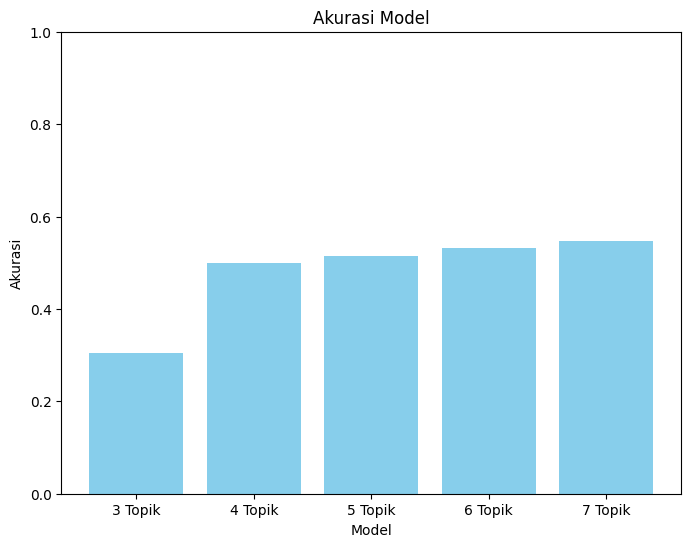

In [ ]:
import matplotlib.pyplot as plt

# Contoh data akurasi (misalnya, untuk beberapa model atau eksperimen)
akurasi = [akurasi_3, akurasi_4, akurasi_5, akurasi_6, akurasi_7]

# Label untuk setiap akurasi (opsional)
model_labels = ['3 Topik', '4 Topik', '5 Topik', '6 Topik', '7 Topik']

# Membuat plot
plt.figure(figsize=(8, 6))
plt.bar(model_labels, akurasi, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Akurasi Model')
plt.ylim(0, 1)  # Mengatur batas sumbu y jika diperlukan (0-1 untuk akurasi)

# Menampilkan plot
plt.show()

# **TF IDF DATA**

In [ ]:
%cd /content/
os.mkdir('data_TFIDF')

In [ ]:
import gdown
# download data

nama_data = '/content/data_TFIDF/data_TFIDF.csv'
gdown.download(f'https://drive.google.com/uc?id=1r4AN5YdXxQ8ailMy5mILMZk7OAKaiVki', nama_data, quiet=False)

In [ ]:
data_TFIDF = pd.read_csv('/content/data_TFIDF/data_TFIDF.csv')

In [ ]:
data_TFIDF["label abstrak"] = label

In [ ]:
data_TFIDF

,Abstrak,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,...,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu,label abstrak
0,sistem informasi akademik siakad sistem inform...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
1,jalan koneksi jaring komputer lancar ganggu ha...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
2,web server perangkat lunak server fungsi terim...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
3,jadwal kuliah guru kompleks masalah variabel t...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
4,iring kembang teknologi dunia muncul teknologi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,investasi saham milik resiko rugi dikarenakanp...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
854,information retrieval ir ambil informasi simpa...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
855,klasifikasi citra proses kelompok piksel citra...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
856,identifikasi atribut pejal kaki salah teliti k...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK


In [ ]:
x = data_TFIDF.iloc[:, 1:-1]

y = data_TFIDF['label abstrak']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_TFIDF['label abstrak'] = le.fit_transform(data_TFIDF['label abstrak'])

y = le.transform(y)

In [ ]:
x

,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,absah,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x)

In [ ]:
kmeans.cluster_centers_

array([[ 2.65450271e-04,  3.34071361e-04,  2.35332335e-04, ...,
        -1.62630326e-18,  2.43945489e-19,  2.43945489e-19],
       [ 4.60785923e-19,  4.87890978e-19,  1.35525272e-19, ...,
         8.10000727e-04,  2.81299809e-04,  2.81299809e-04]])

In [ ]:
kmeans_label =kmeans.labels_

In [ ]:
data_TFIDF["hasil klustering"] = kmeans_label

In [ ]:
data_TFIDF

,Abstrak,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,...,zcz,zf,zona,zone,zoning,zoom,zucara,zungu,label abstrak,hasil klustering
0,sistem informasi akademik siakad sistem inform...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,jalan koneksi jaring komputer lancar ganggu ha...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,web server perangkat lunak server fungsi terim...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,jadwal kuliah guru kompleks masalah variabel t...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,iring kembang teknologi dunia muncul teknologi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,investasi saham milik resiko rugi dikarenakanp...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
854,information retrieval ir ambil informasi simpa...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
855,klasifikasi citra proses kelompok piksel citra...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
856,identifikasi atribut pejal kaki salah teliti k...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 650 out of 858 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.76


In [ ]:
data_TFIDF.to_csv('TFIDF_data_abstrak_kluster.csv', index=False)